# Usual steps for ML modeling
1) Gathering the data from various sources

2) Data preprocessing( Remove missing or any outliers values, scaling , etc)

3) Separating data into features and labels

4) Training the model

5) Testing & scoring

6) prediction or classification

# Simple Linear Regression
Simple linear regression is useful for finding relationship between two continuous variables. One is predictor or independent variable and other is response or dependent variable.

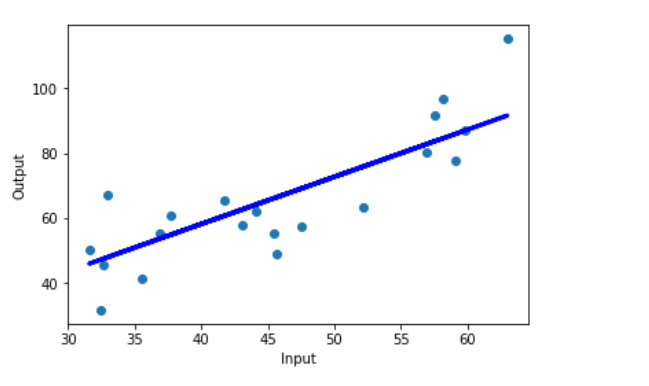

The core idea is to obtain a line that best fits the data. The best fit line is the one for which total prediction error (all data points) are as small as possible. Error is the distance between the point to the regression line.

Y(pred) = b0 + b1*x


The values b0 and b1 must be chosen so that they minimize the error. If sum of squared error is taken as a metric to evaluate the model, then goal to obtain a line that best reduces the error.

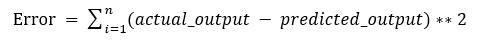

# For a model with one predictor
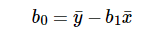


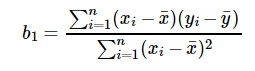

In [1]:
#Load the data. See the first 5 rows 

import pandas as pd


df=pd.read_csv("./datasets/AAPL.csv")
df.head(5)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2016-04-11,27.242500,27.652500,27.207500,27.254999,25.350115,117630000
1,2016-04-12,27.334999,27.625000,27.165001,27.610001,25.680305,108929200
2,2016-04-13,27.700001,28.084999,27.700001,28.010000,26.052345,133029200
3,2016-04-14,27.905001,28.097500,27.832500,28.025000,26.066298,101895600
4,2016-04-15,28.027500,28.075001,27.432501,27.462500,25.543112,187756000


In [2]:
df.isna().sum() #check the total number of missing values in each column

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

# Objective

Predicting Close Price of the share based on ONE of the other attributes

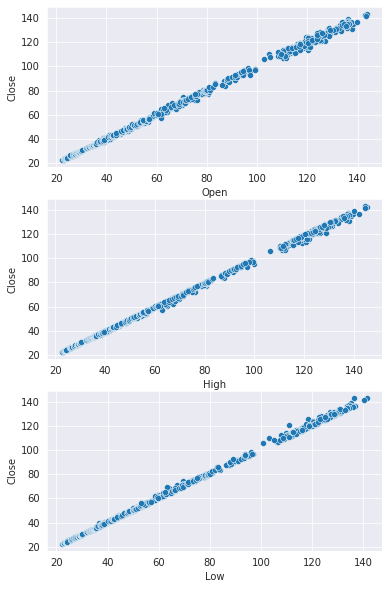

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style("darkgrid")
fig,arr = plt.subplots( 3, 1, figsize=(6,10) )

sns.scatterplot( x='Open',y='Close',data=df,ax=arr[0])
sns.scatterplot( x='High',y='Close',data=df,ax=arr[1])
sns.scatterplot( x='Low',y='Close',data=df,ax=arr[2])

# Feature and Label

We will select our dependent variable(target) and independent variable(feature)

In [4]:


feature=df [['Open']]

label=df [['Close']]

In [5]:
#divide the available data into training and testing set!

from sklearn.model_selection import train_test_split

In [6]:
x_train,x_test,y_train,y_test=train_test_split( feature,label,test_size=0.2  )

In [7]:
x_train #features which are available for training

,Open
1028,77.025002
1081,93.709999
902,64.684998
922,66.870003
187,28.980000
...,...
420,42.257500
655,47.907501
446,44.037498
1102,124.697502


In [8]:
y_test

,Close
540,47.560001
1147,111.199997
110,28.892500
394,42.259998
830,52.419998
...,...
28,23.549999
837,49.759998
998,61.935001
1003,60.352501


In [9]:
from sklearn.linear_model import LinearRegression

In [10]:
model=LinearRegression() #model

In [11]:
model.fit(x_train,y_train) #training step

LinearRegression()

In [12]:
model.coef_             #value for m

array([[0.99765221]])

In [13]:
model.intercept_          #slope intercept c

array([0.13560023])

In [14]:
#calculate according to thhe formula to verify
#176.23*0.99954421 + 0.07693881

In [15]:
#TEST THE MODEL!!!!!!


"""

1) model will be fed testing input(x_test)
2) model will make a prediction for each value in x_test( call this predicted_y)
3)predicted_y with y_test (actual testing labels)
4) accordingly a score is obtained
"""

model.score(x_test,y_test)


0.9987213819876267

In [16]:
y_predicted= model.predict(x_test) #pass only testing feature



# y_predicted

In [17]:
#create a predicted column
predicted=pd.DataFrame(y_predicted , columns=['Predicted']).reset_index(drop=True)

In [18]:
y_test = y_test.reset_index(drop=True) #alignment of old values need to match with predicted

In [19]:
pd.concat([predicted,y_test],axis=1 )

,Predicted,Close
0,47.022761,47.560001
1,114.915490,111.199997
2,28.533770,28.892500
3,42.012050,42.259998
4,52.128247,52.419998
...,...,...
247,23.740052,23.549999
248,48.873406,49.759998
249,63.174749,61.935001
250,60.693091,60.352501


In [20]:
from sklearn.metrics import mean_squared_error

mean_squared_error(predicted,y_test)

1.1224577434729728